<a href="https://colab.research.google.com/github/sauloajs/tech-challenge-02/blob/main/SVM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Carregar os dados
df = pd.read_excel('/content/base_unificada.xlsx')

In [ ]:
# Vamos usar apenas 'valor_abertura', 'valor_maximo', 'valor_minimo', 'volume' para prever 'ultimo_valor'
df = df[['valor_abertura', 'valor_maximo', 'valor_minimo', 'volume', 'ultimo_valor']]


In [ ]:
# Remova quaisquer linhas com valores NaN
df = df.dropna()

In [ ]:
# Converter os valores para float e substituir ',' por '.'
for column in df.columns:
    if df[column].dtype == 'object': # Verifica se a coluna é do tipo 'object' (string)
        df[column] = df[column].str.replace(',', '.').astype(float)


In [ ]:
# Separar os dados em conjuntos de treinamento e teste
X = df[['valor_abertura', 'valor_maximo', 'valor_minimo', 'volume']]
y = df['ultimo_valor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Treinando o modelo
model = svm.SVR(kernel='linear') # Utilizamos SVR para regressão
model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
# Fazendo previsões
y_pred = model.predict(X_test)

In [ ]:
# Converter previsões para classes binárias
# Isso é uma simplificação, pois normalmente você iria querer prever o valor exato do 'ultimo_valor'
# Mas como queremos calcular a acurácia (que é uma métrica de classificação), faremos isso
y_test_bin = (y_test >= y_test.shift()).astype(int)
y_pred_bin = (pd.Series(y_pred) >= pd.Series(y_pred).shift()).astype(int)

In [ ]:
# Calcular acurácia
acc = accuracy_score(y_test_bin, y_pred_bin)
print(f'Acurácia: {acc*100:.2f}%')

Acurácia: 99.35%


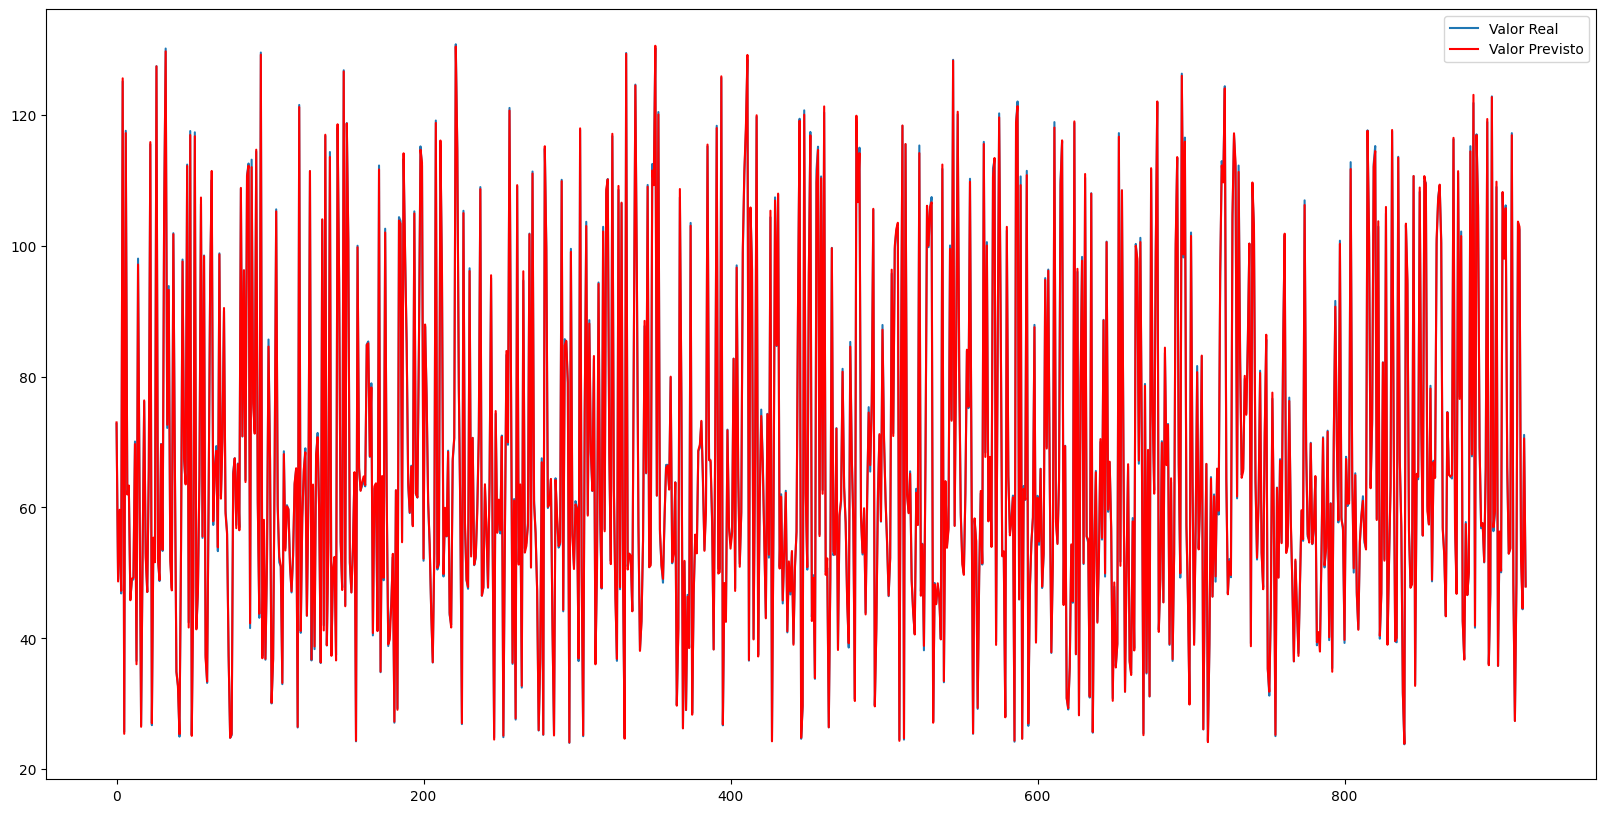

In [ ]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)


# Definindo o tamanho do gráfico
plt.figure(figsize=(20,10))

# Plotando os valores reais
plt.plot(y_test.values, label='Valor Real')

# Plotando os valores previstos
plt.plot(predictions, color='red', label='Valor Previsto')

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.show()


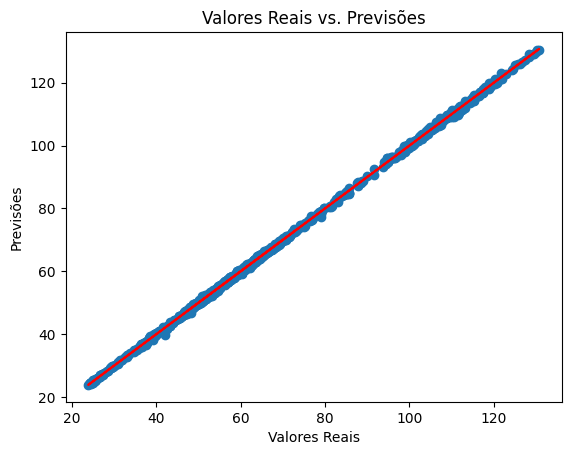

In [ ]:
import matplotlib.pyplot as plt

# Cria um gráfico de dispersão
plt.scatter(y_test, predictions)

# Título e rótulos dos eixos
plt.title('Valores Reais vs. Previsões')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')

# Traça uma linha de referência de y=x, que representa uma previsão perfeita
plt.plot(y_test, y_test, 'r')

# Mostra o gráfico
plt.show()
